In [175]:
%matplotlib inline
import datetime as dt
import json
import os
import sys

import matplotlib.pyplot as plt

import matplotlib.dates as mdates
import numpy as np
from matplotlib.dates import AutoDateFormatter, AutoDateLocator
from random import sample

In [176]:
def assignment2json(root=None):
    os.chdir(root)
    song_json_pairs = {}
    for json_file_path in sorted(os.listdir()):
        json_data = open(json_file_path, "r")
        json_obj = json.load(json_data)
        position = 1
        for song in json_obj:
            song["pos"] = position
            position += 1
            song["scraped"] = dt.datetime.strptime(json_file_path.split("_")[0], "%Y%m%d").date()
            
            for key in song["statistics"]:
                song["statistics"][key] = int(song["statistics"][key])
    
#             print(song["snippet"]["title"])#, song["id"], song)
            song["snippet"]["title"] = "".join(char for char in song["snippet"]["title"] if char.isalnum() or char in " -()&$,'")
#             print(song["snippet"]["title"])#, song["id"], song)
            song_json_pairs.setdefault(song["id"], []).append(song)
        
        json_data.close()
        
    os.chdir("..")

    return song_json_pairs

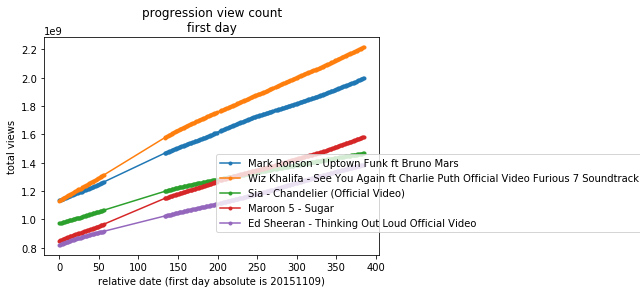

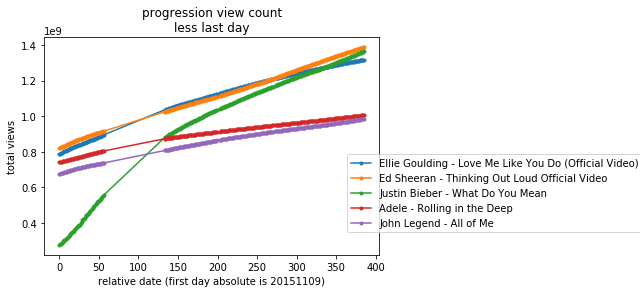

In [180]:


def ids_sorted_by_viewCount(date, start=0, end=5, step=1, maximum_views=sys.maxsize): 
    sorted_on_views = sorted([song for song in json.load(open(f"youtube_top100/{date}_1800_data.json", "r"))
                             if int(song["statistics"]["viewCount"]) < maximum_views],
                 key=lambda x: int(x["statistics"]["viewCount"]), reverse=True)[start:end:step]
    return [song["id"] for song in sorted_on_views]

def views_time(ids, save_path, songjsons, text=""):     
    fig, ax = plt.subplots()
    rel_dates = []
    views = []
    for id in ids:
        jsons = songjsons[id]
        rel_dates = [(item["scraped"] - jsons[0]["scraped"]).days for item in jsons]
        views = [item["statistics"]["viewCount"] for item in jsons]
        ax.plot(rel_dates, views, ".-", label=jsons[0]["snippet"]["title"])
    
    ax.set_title("progression view count\n"+ text)
    ax.set_ylabel("total views")
    ax.set_xlabel("relative date (first day absolute is 20151109)")
    fig.legend(bbox_to_anchor=(1.5, 0.5))

    fig.savefig(f"{save_path}.png", bbox_inches="tight")
    return ax


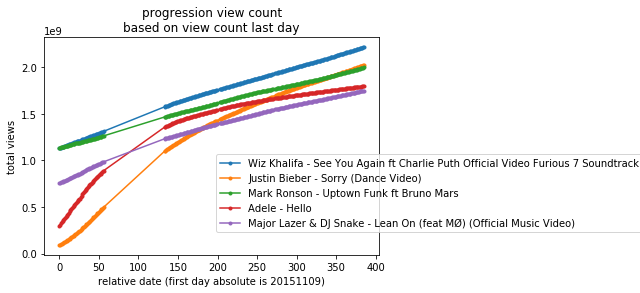

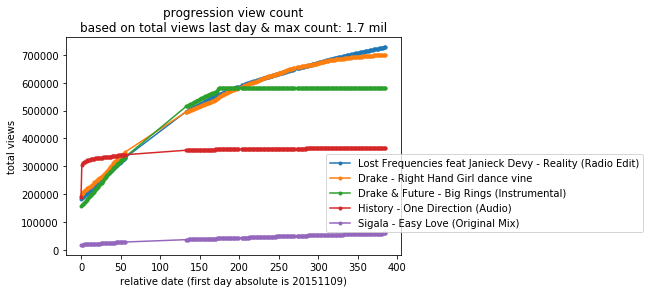

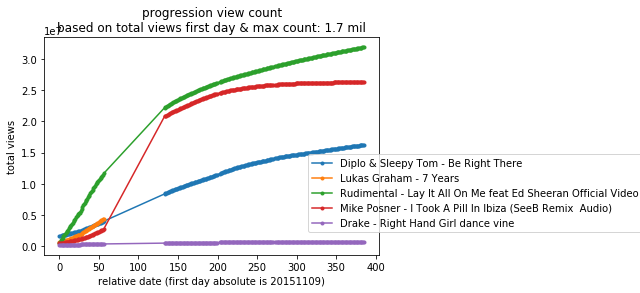

In [212]:

def ex2_graph1():
    """plots the view/time for the 5 most viewed songs at the end of observation"""
    
    song_jsons_youtube = assignment2json(root="youtube_top100")
    
    popular_last_day = ids_sorted_by_viewCount("20161128",0,5)#, maximum_views=1700000 )# value of last day
    views_time(popular_last_day, "most views on last day of observation",song_jsons_youtube, "based on view count last day")

    popular_last_day = ids_sorted_by_viewCount("20161128",0,5, maximum_views=1700000 )# value of last day
    views_time(popular_last_day, "most views on last day of observation ()",song_jsons_youtube, "based on total views last day & max count: 1.7 mil")

    popular_last_day = ids_sorted_by_viewCount("20151109",0,5, maximum_views=1700000 )# value of last day
    views_time(popular_last_day, "most views on the first day of observation under 1.7 mil",song_jsons_youtube, "based on total views first day & max count: 1.7 mil")
               

ex2_graph1()

Adele - Hello
Justin Bieber - Sorry (Dance Video)
Drake - Hotline Bling
Justin Bieber - What Do You Mean
Shawn Mendes - Stitches (Official Video)
The Weeknd - Can't Feel My Face
Ellie Goulding - On My Mind
R City - Locked Away ft Adam Levine
Ariana Grande - Focus
Calvin Harris & Disciples - How Deep Is Your Love
Major Lazer & DJ Snake - Lean On (feat MØ) (Official Music Video)
Justin Bieber - I'll Show You
The Weeknd - The Hills
Robin Schulz - Sugar (feat Francesco Yates) (OFFICIAL MUSICVIDEO)
Selena Gomez - Same Old Love
One Direction - Perfect (Official Video)
OMI - Cheerleader (Felix Jaehn Remix) Official Video
Ed Sheeran - Photograph (Official Music Video)
MACKLEMORE & RYAN LEWIS - DOWNTOWN (OFFICIAL MUSIC VIDEO)
Rudimental - Lay It All On Me feat Ed Sheeran Official Video
One Direction - Drag Me Down


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


Charlie Puth - Marvin Gaye ft Meghan Trainor Official Video
Drake - Jumpman (Official Video) ft Soulja Boy
Zara Larsson, MNEK - Never Forget You
Sigala - Easy Love (Original Mix)
Selena Gomez - Good For You
Skrillex and Diplo - Where Are Ü Now with Justin Bieber (Official Video)
Alessia Cara - Here
Felix Jaehn - Aint Nobody (Loves Me Better) ft Jasmine Thompson
Lukas Graham - 7 Years
Fetty Wap  - Trap Queen (Official Video) Prod By Tony Fadd
History - One Direction (Audio)
Fetty Wap 679 feat Remy Boyz Official Video
Omi - Hula Hoop (Official Video)
Demi Lovato - Confident (Official Video)
Nicky Jam - El Perdón  Video Lyric  (Prod Saga WhiteBlack)
Ed Sheeran - Thinking Out Loud Official Video
Hailee Steinfeld - Love Myself
Avicii - Waiting For Love
Wiz Khalifa - See You Again ft Charlie Puth Official Video Furious 7 Soundtrack
Jason Derulo - Want To Want Me (Official Video)
Meghan Trainor - Like I'm Gonna Lose You ft John Legend
Lost Frequencies feat Janieck Devy - Reality (Radio Edit)


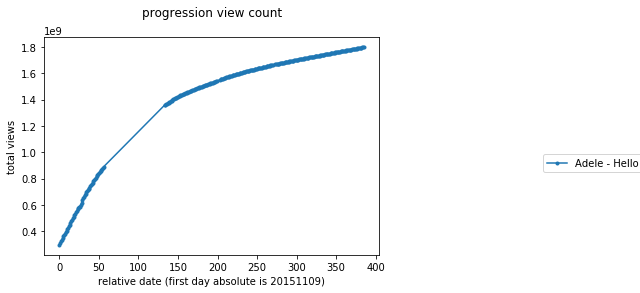

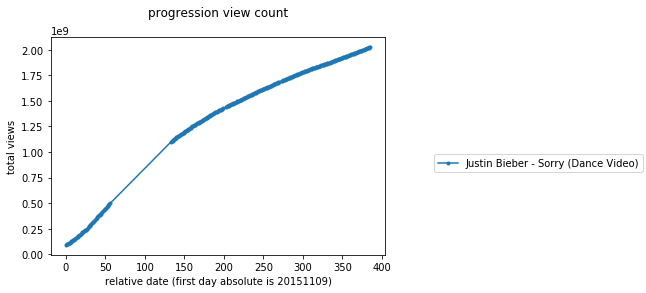

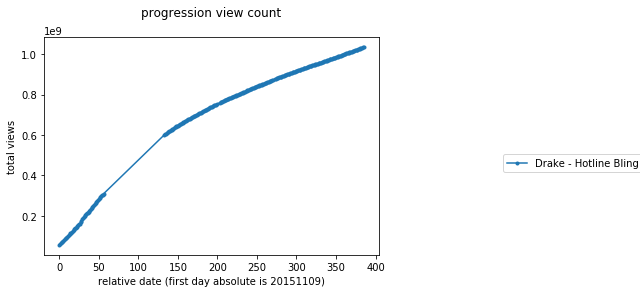

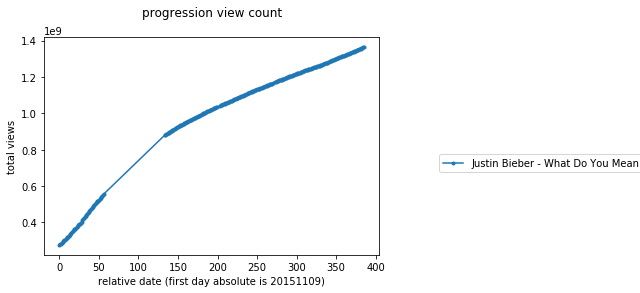

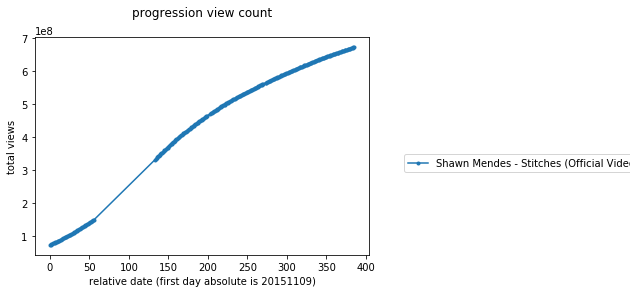

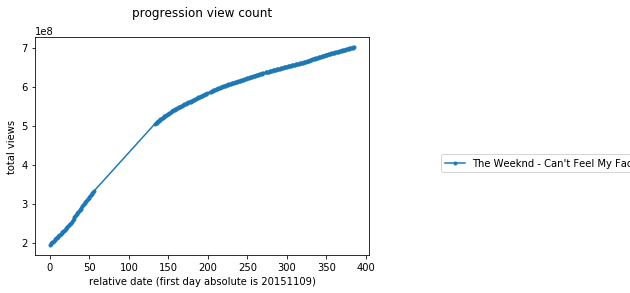

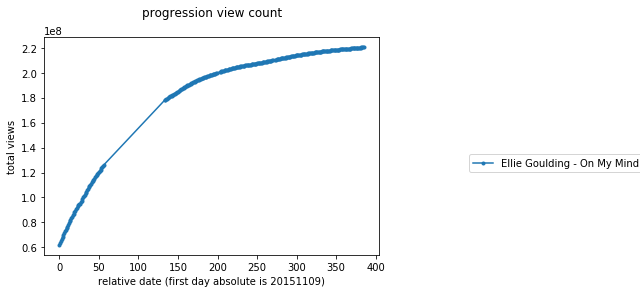

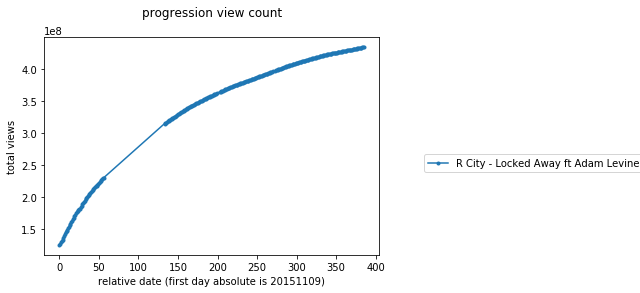

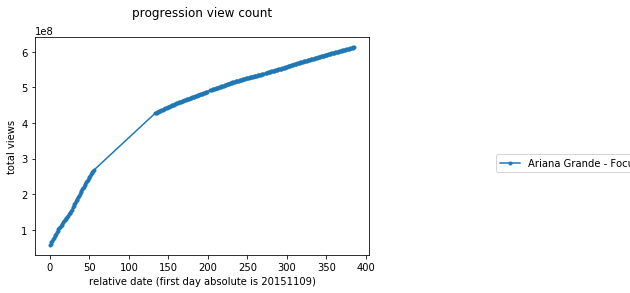

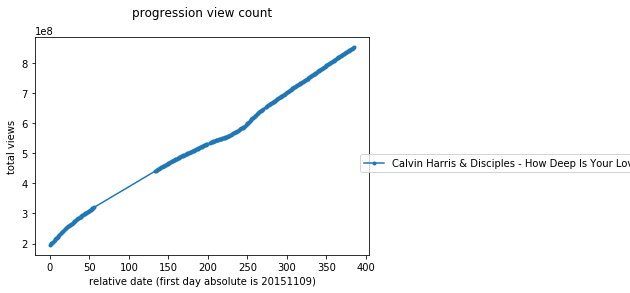

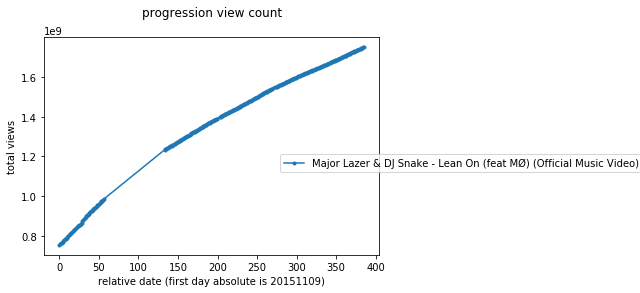

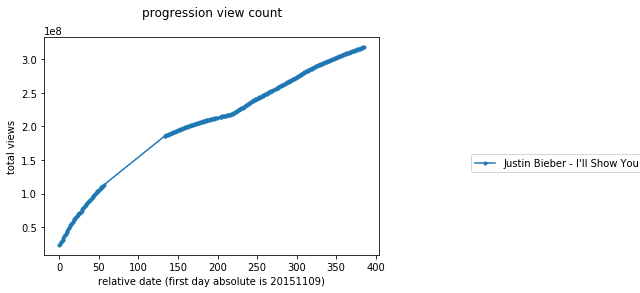

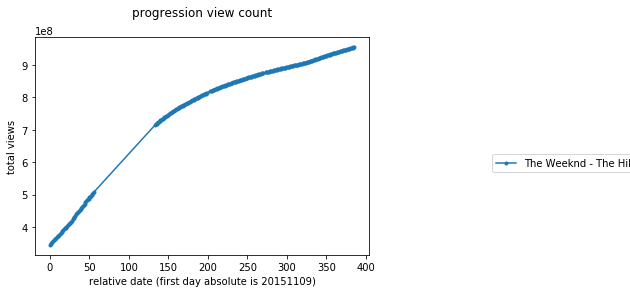

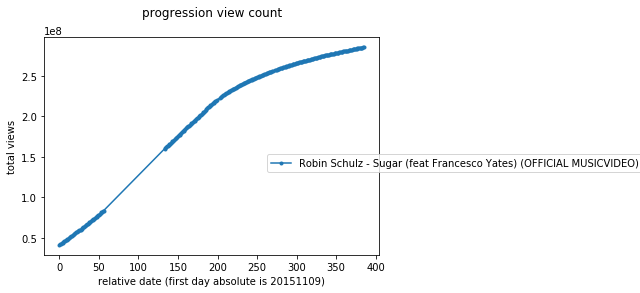

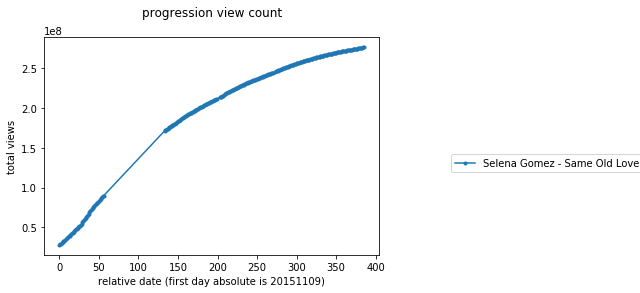

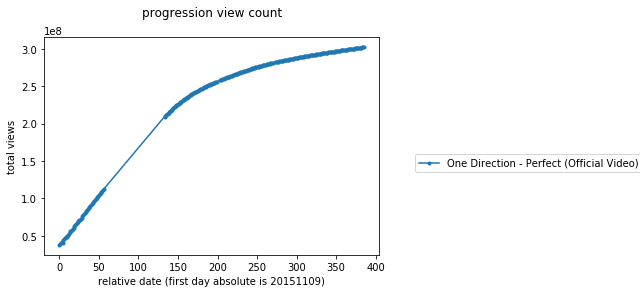

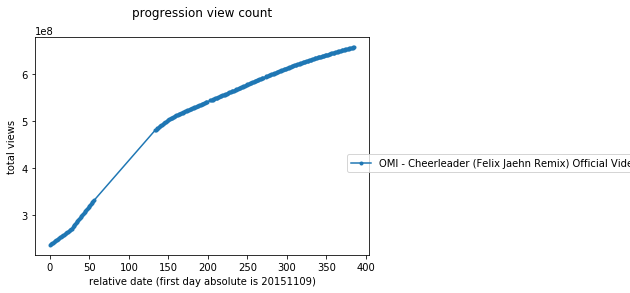

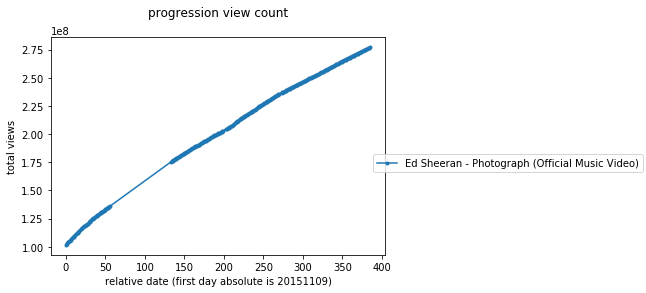

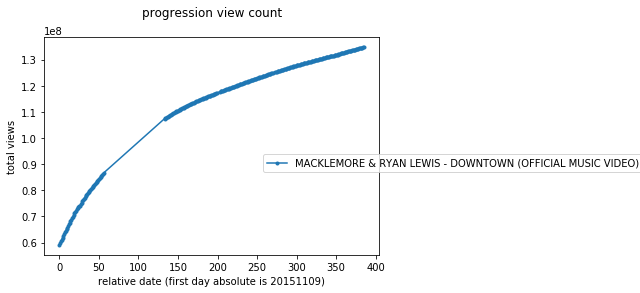

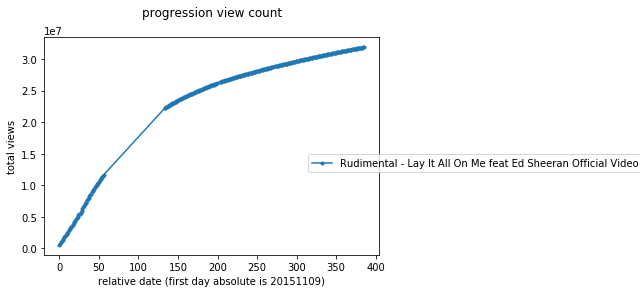

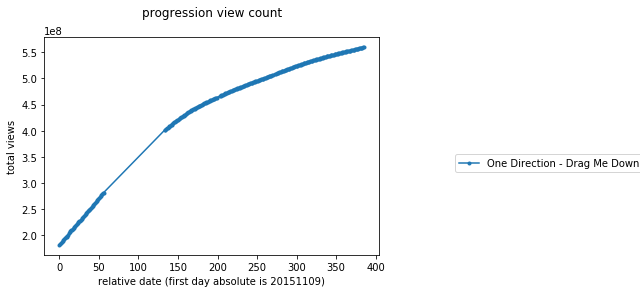

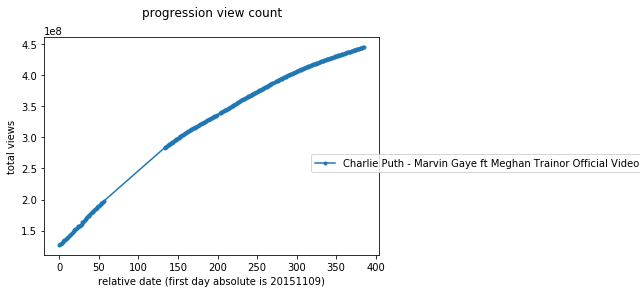

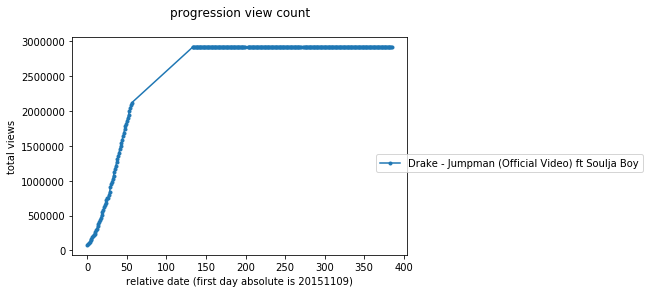

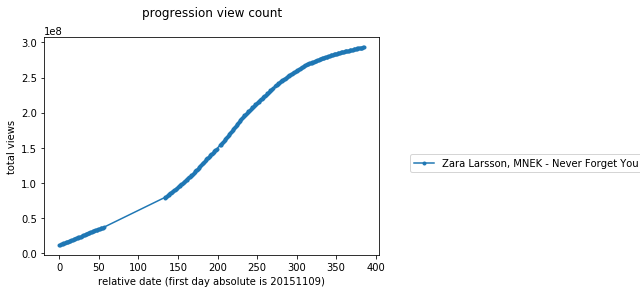

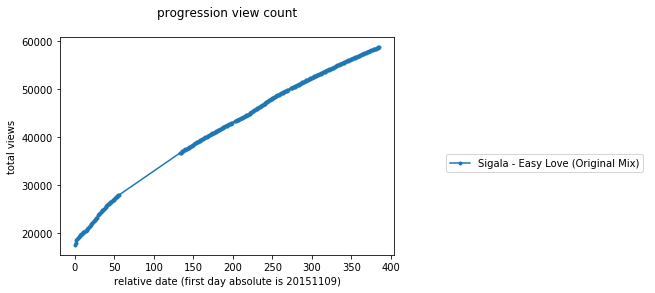

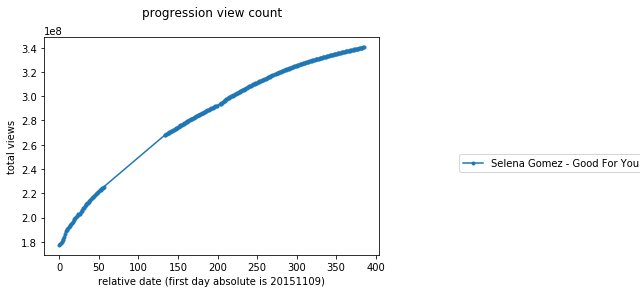

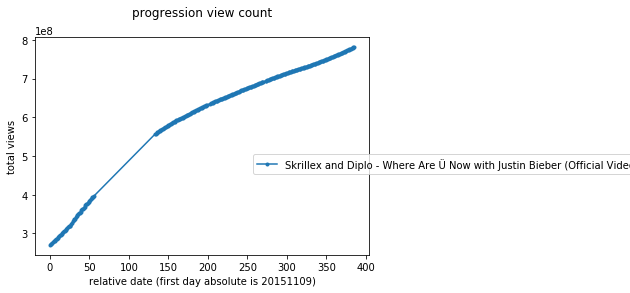

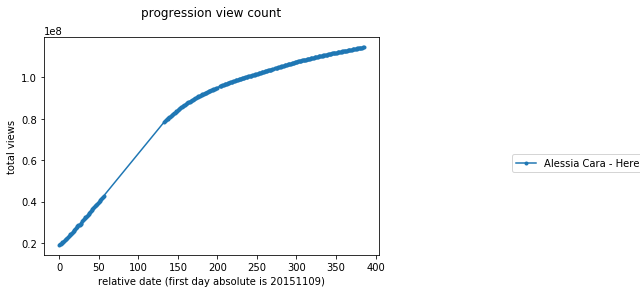

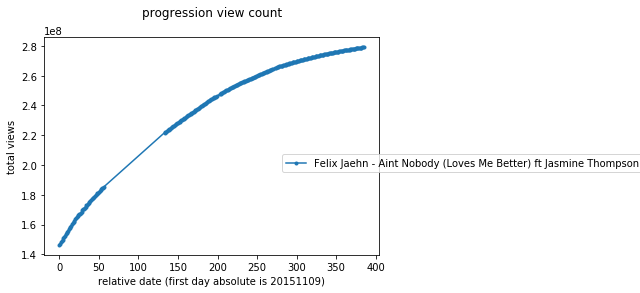

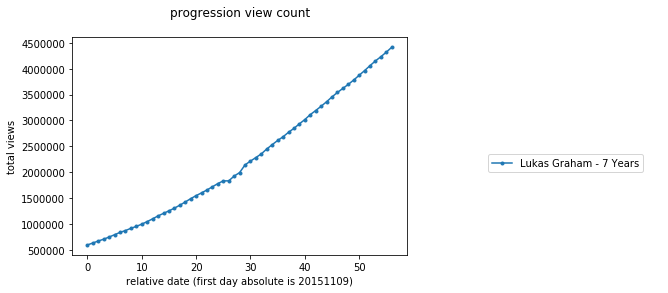

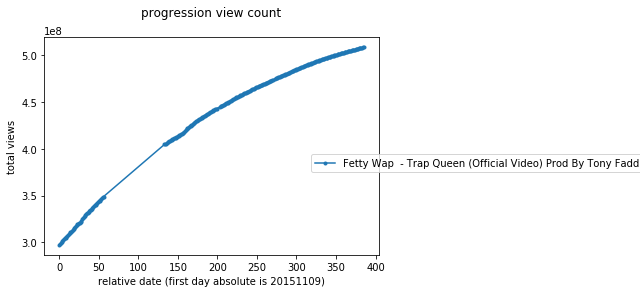

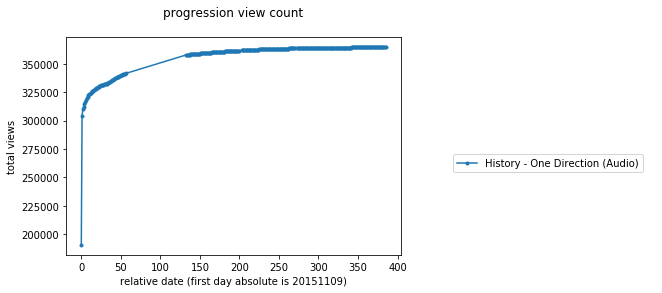

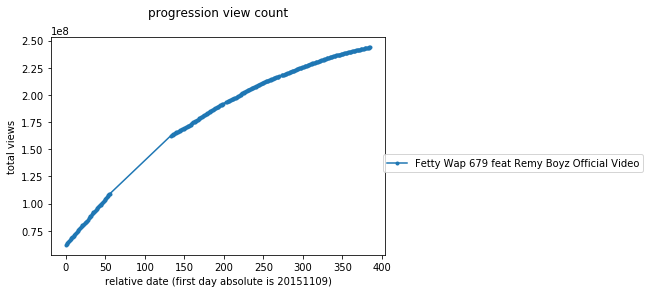

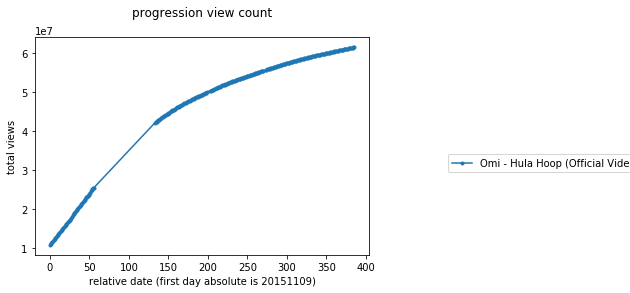

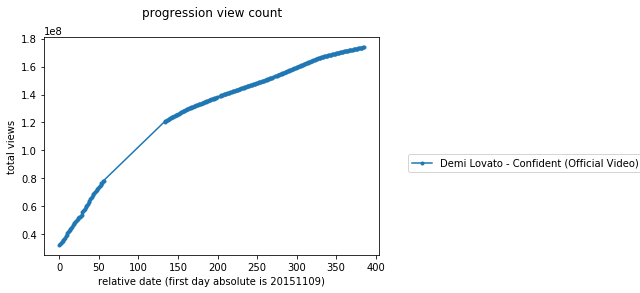

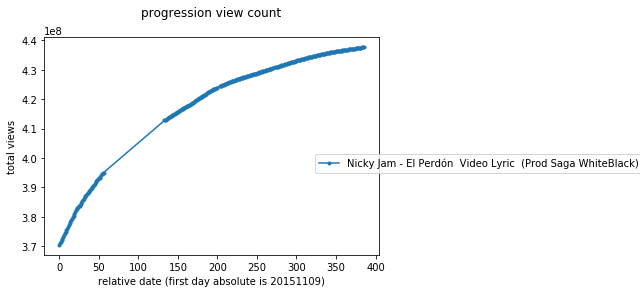

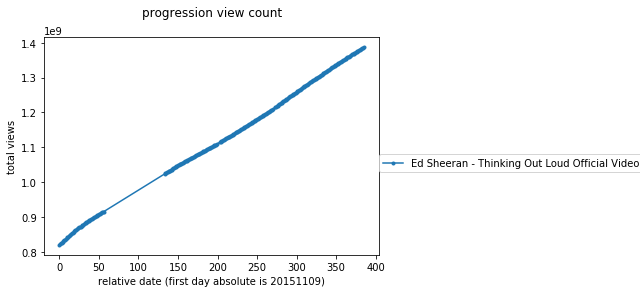

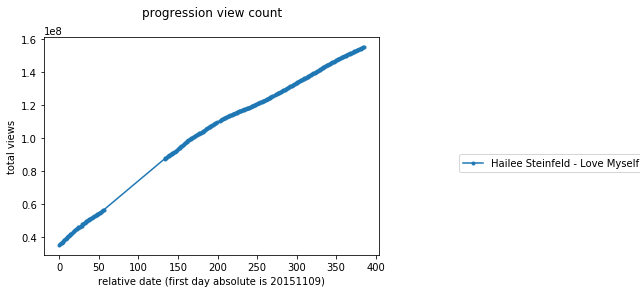

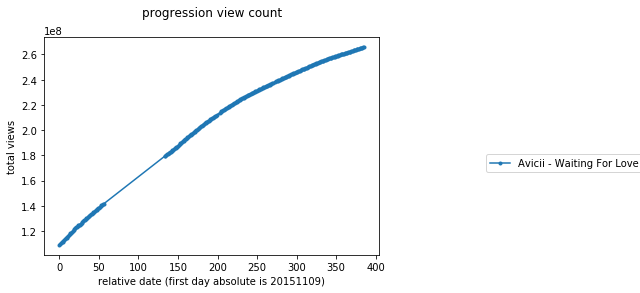

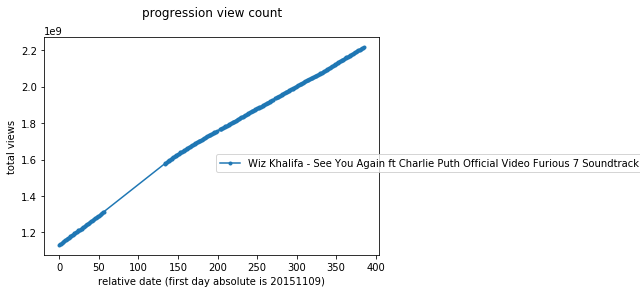

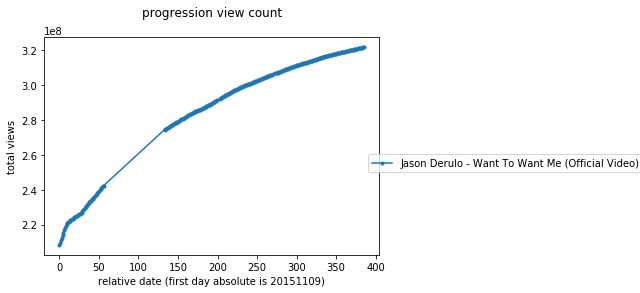

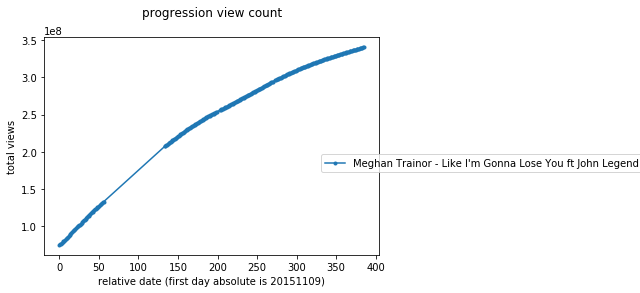

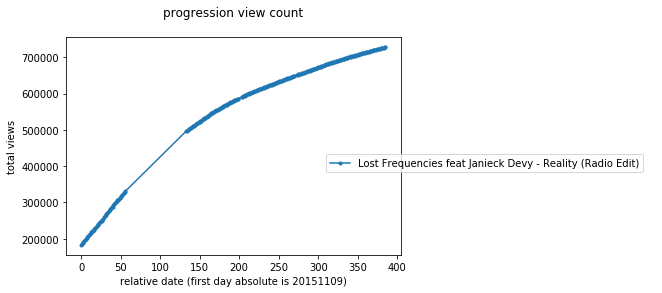

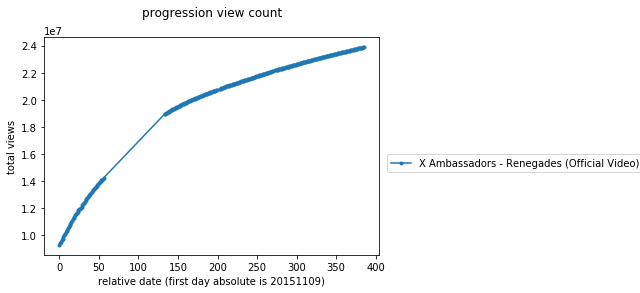

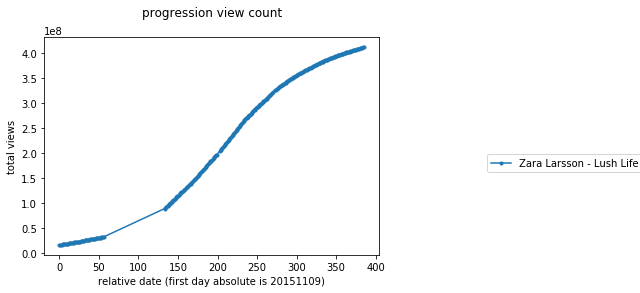

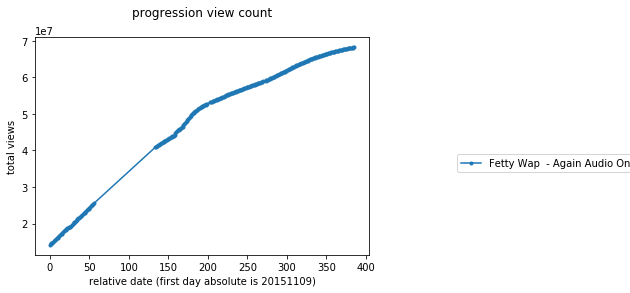

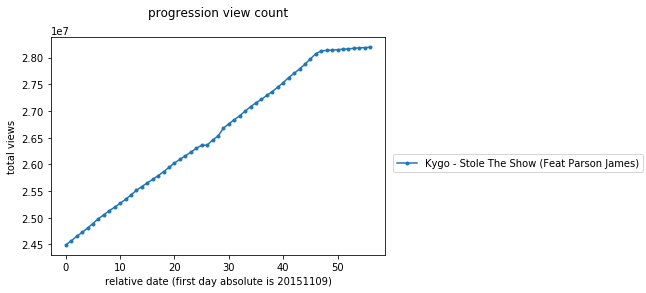

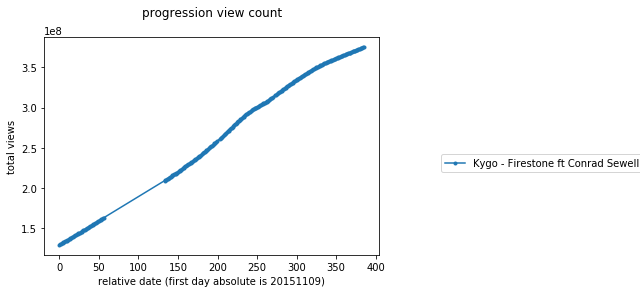

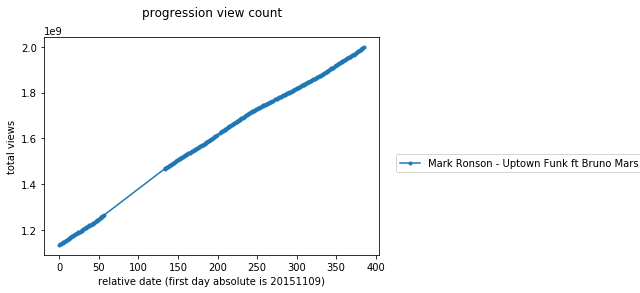

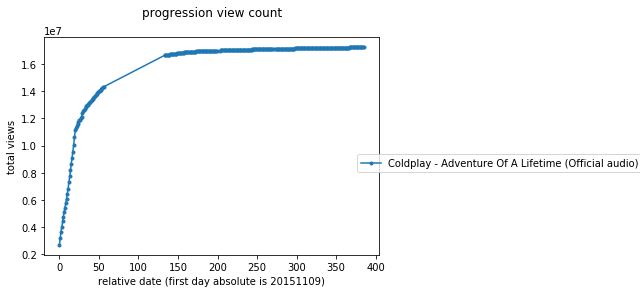

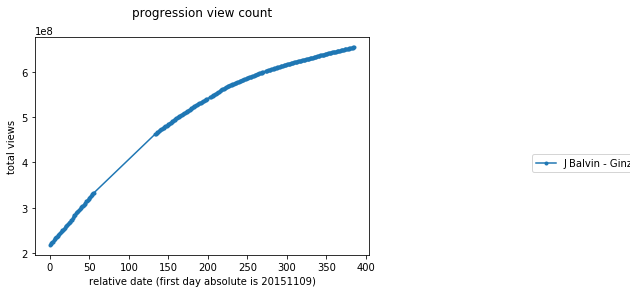

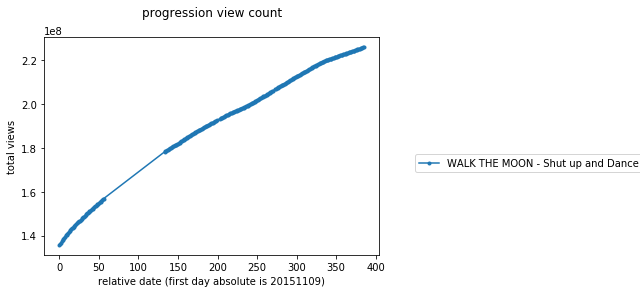

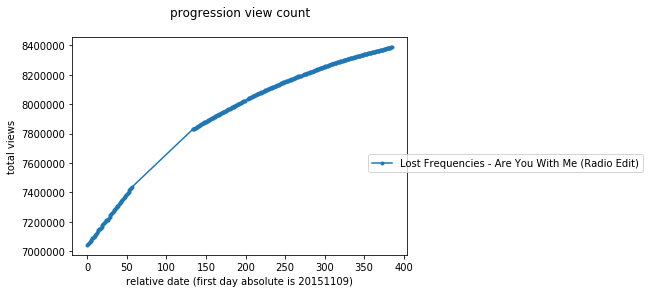

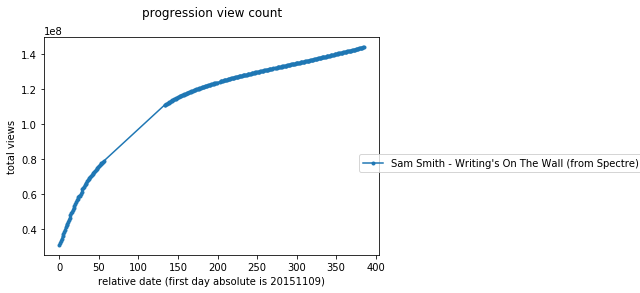

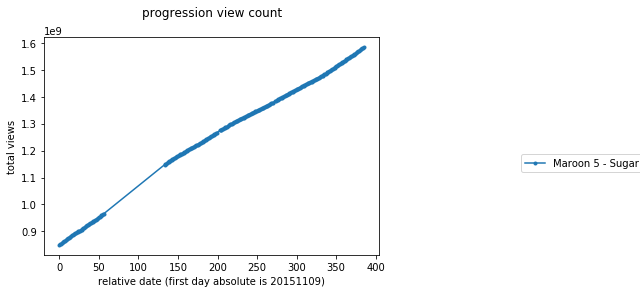

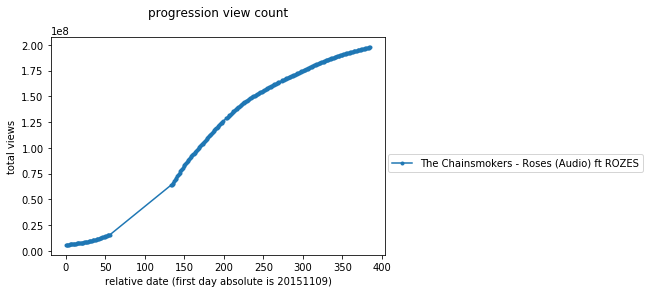

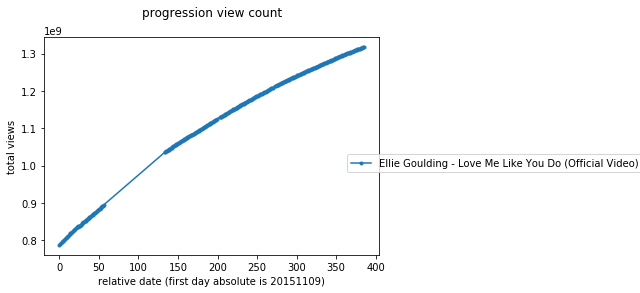

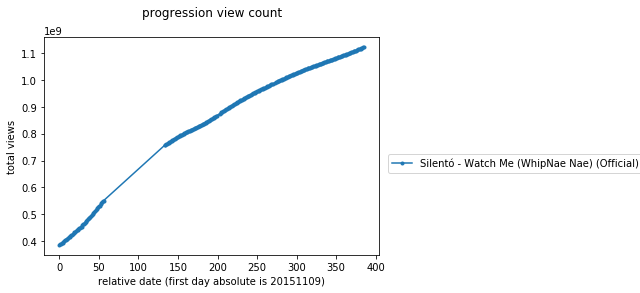

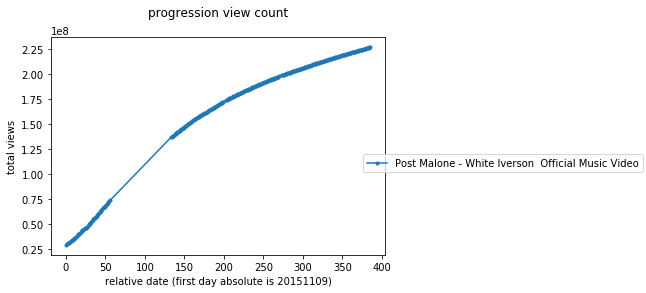

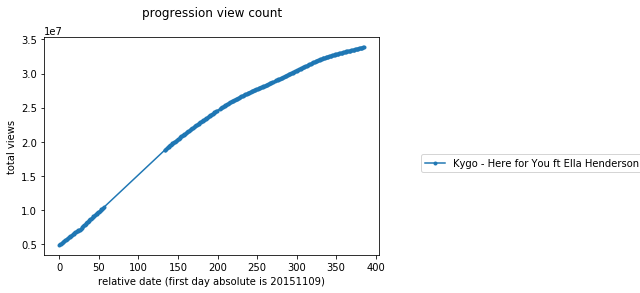

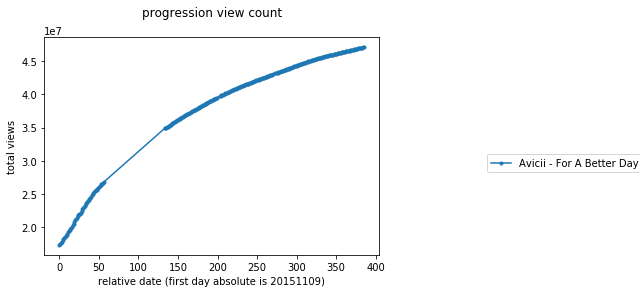

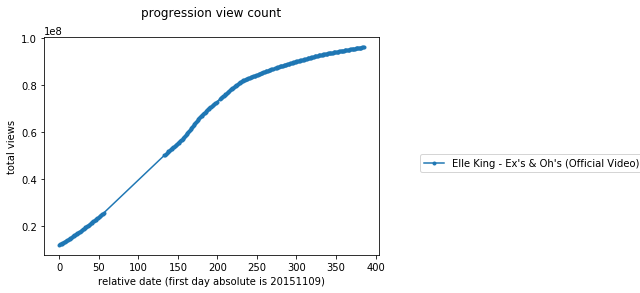

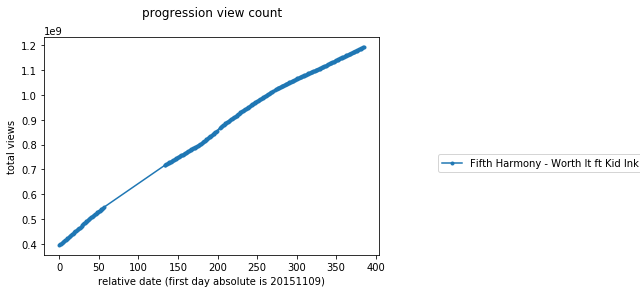

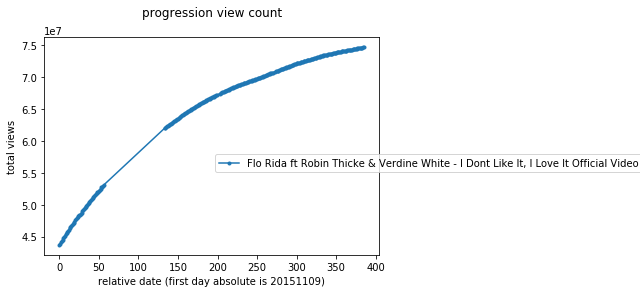

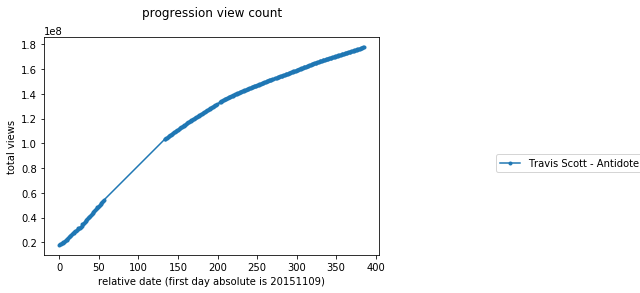

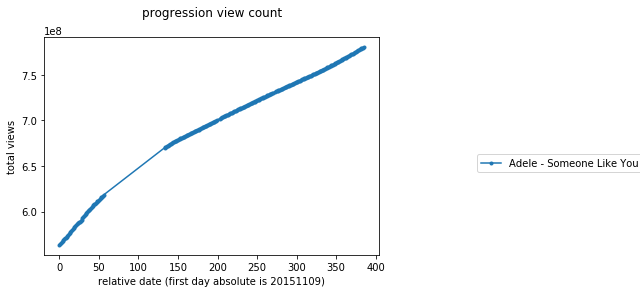

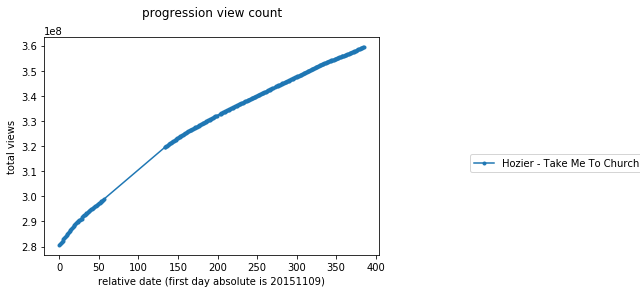

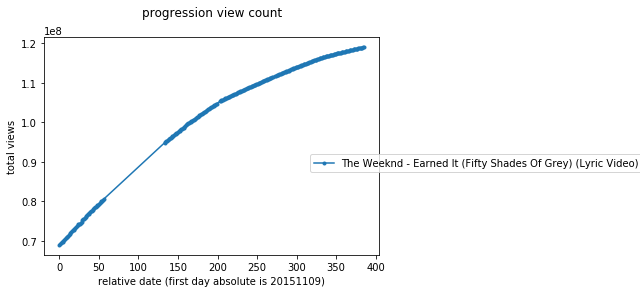

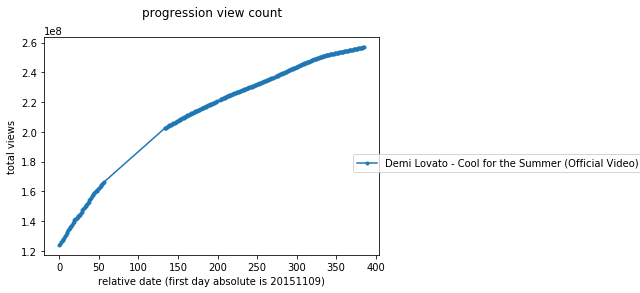

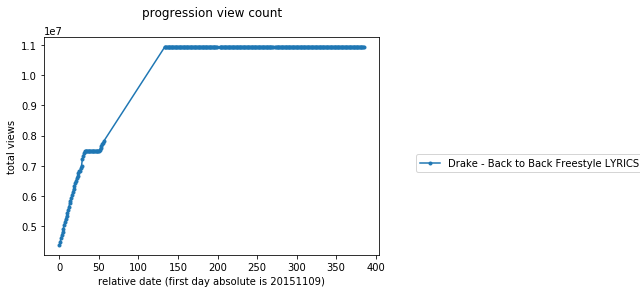

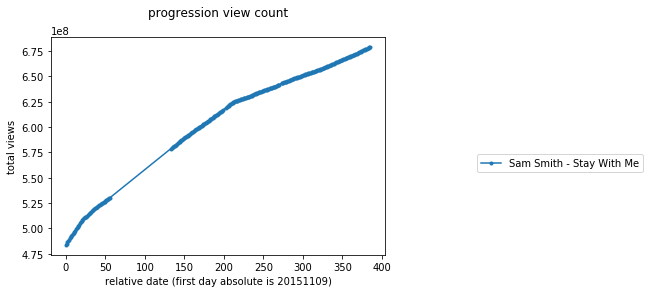

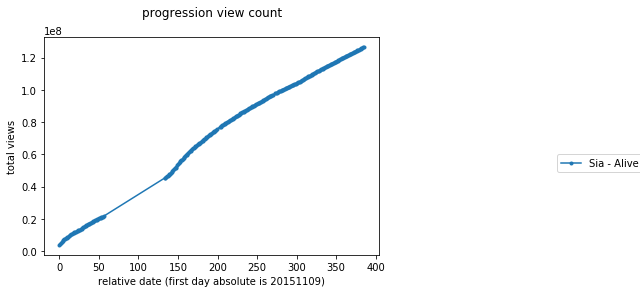

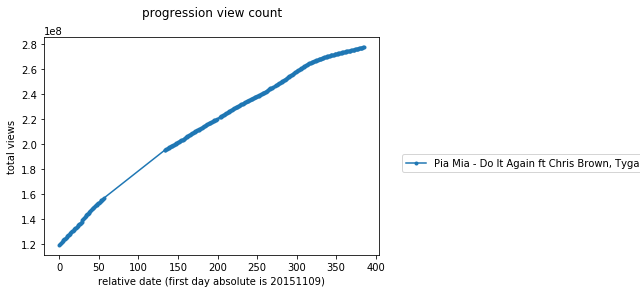

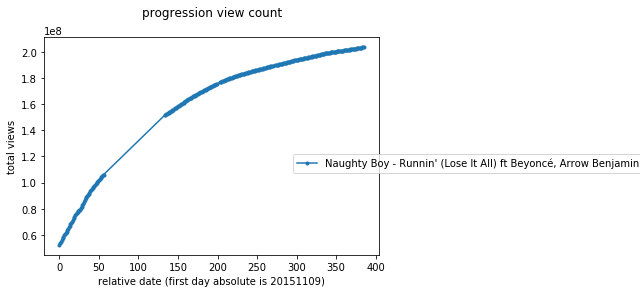

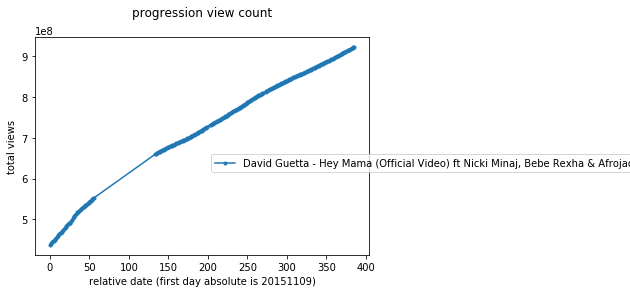

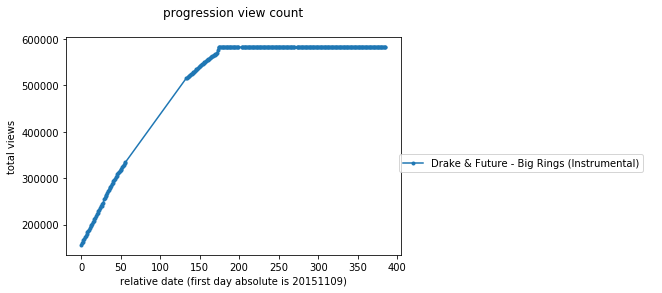

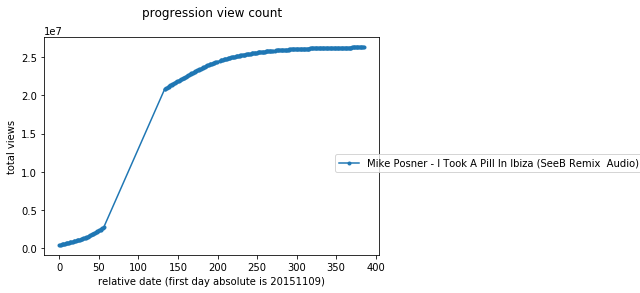

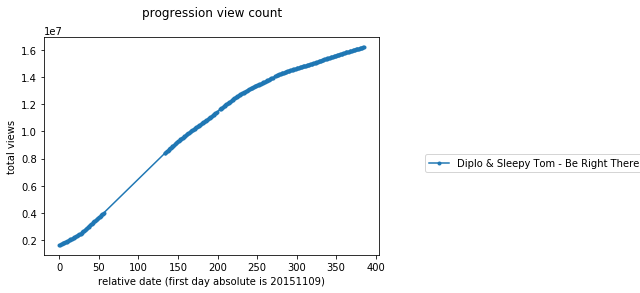

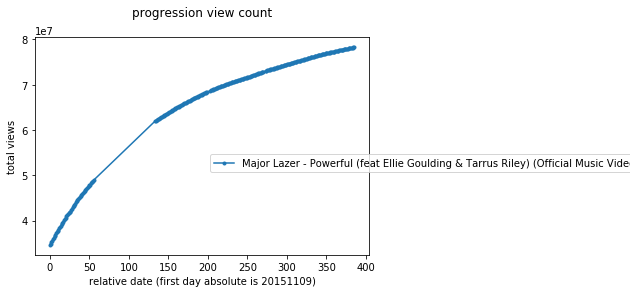

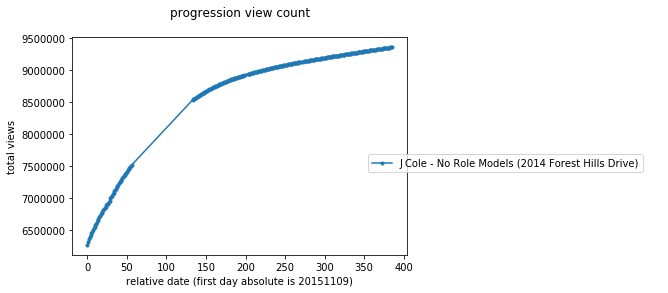

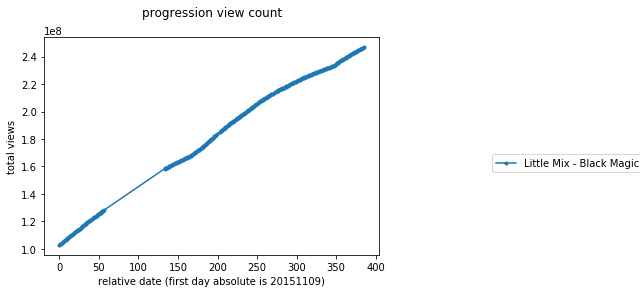

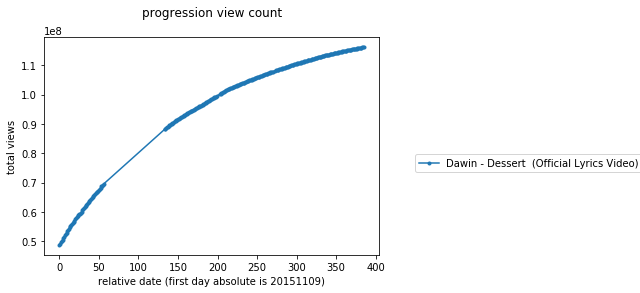

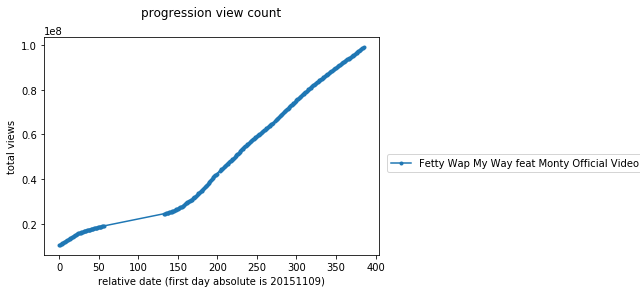

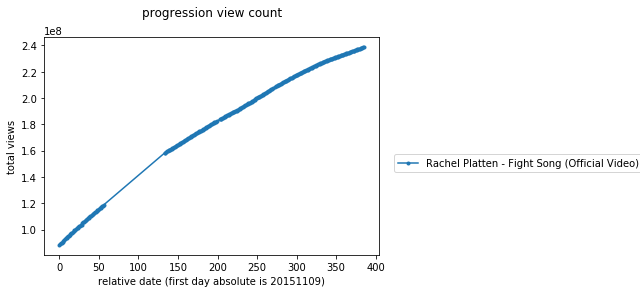

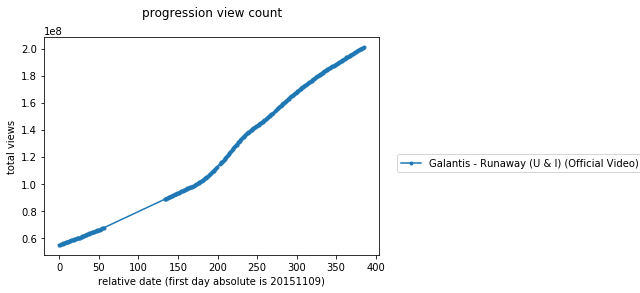

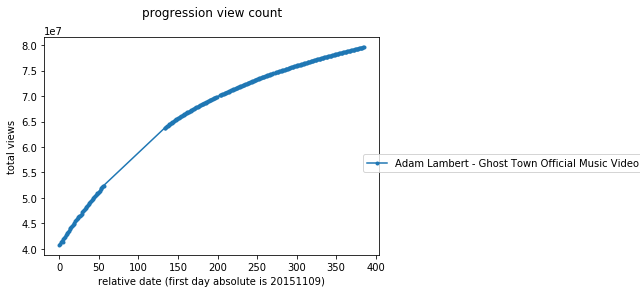

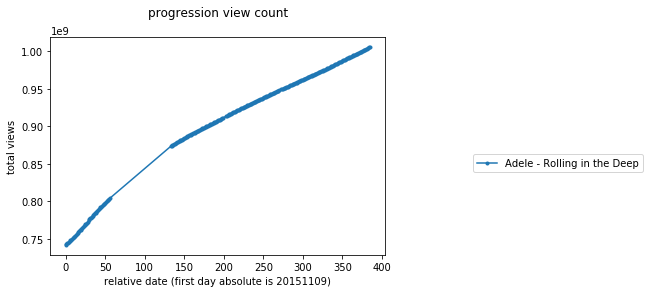

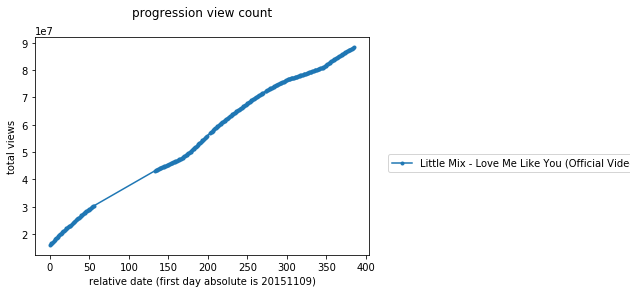

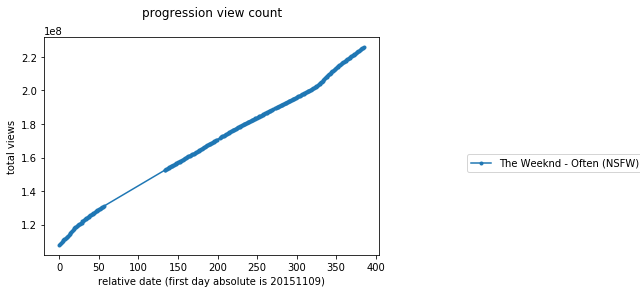

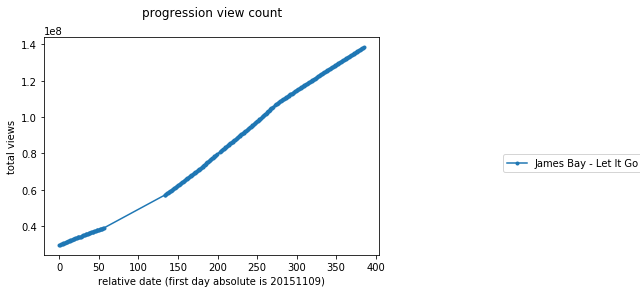

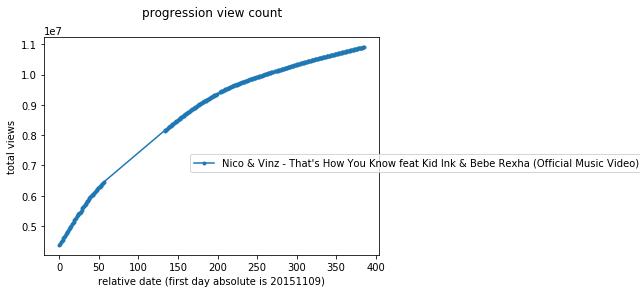

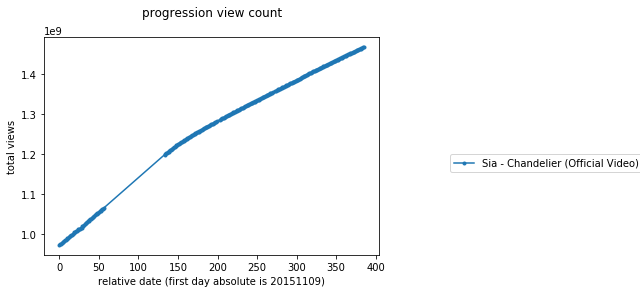

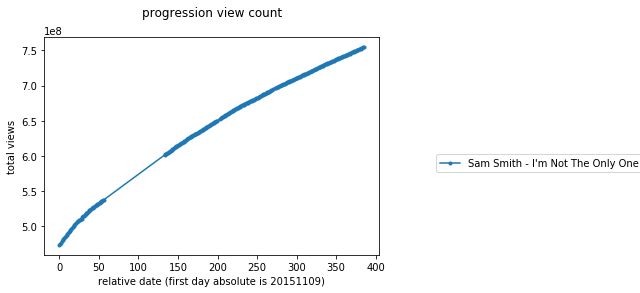

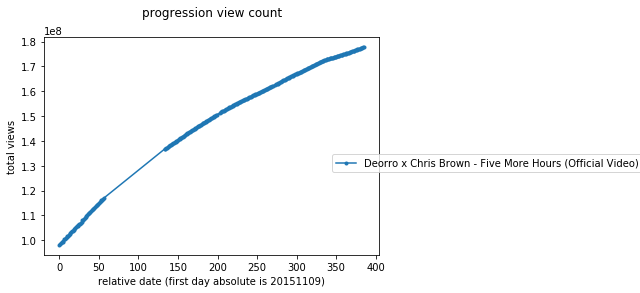

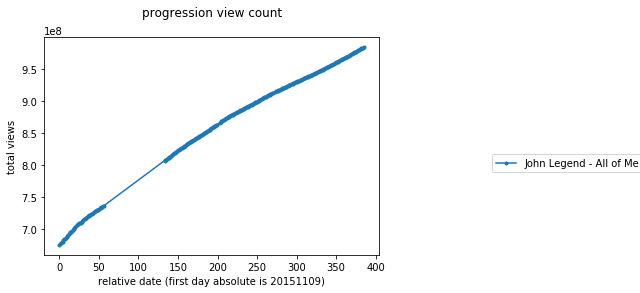

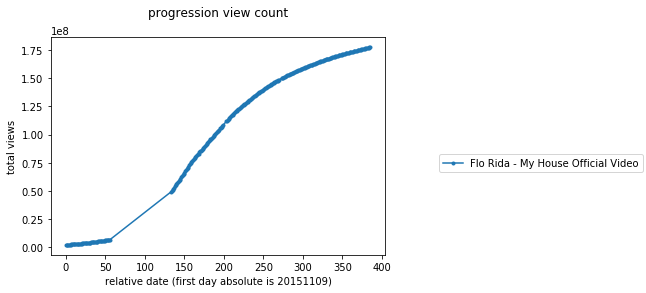

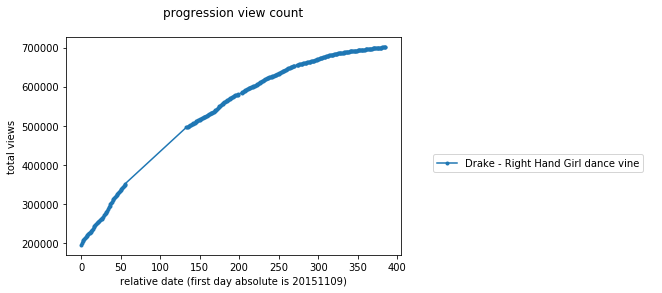

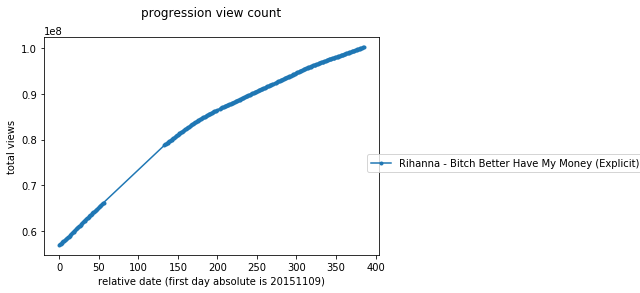

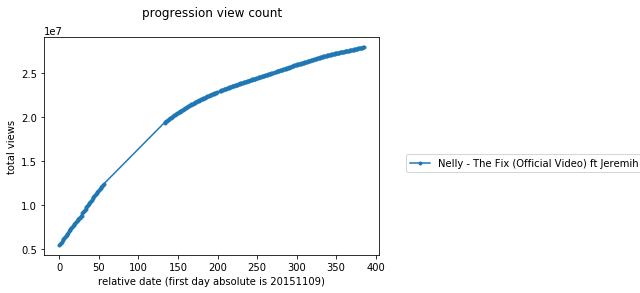

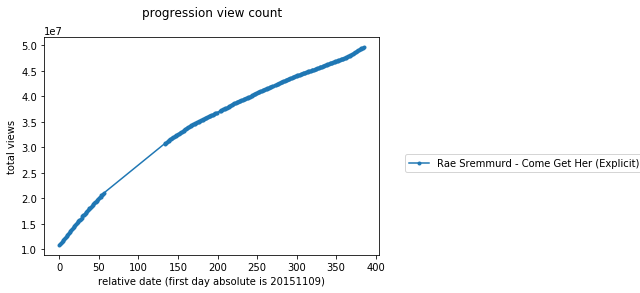

In [122]:
for id in [song["id"] for song in json.load(open(f"youtube_top100/20151109_1800_data.json", "r"))]:
    print(song_jsons_youtube[id][0]["snippet"]["title"])
    views_time(ids=[id], text=""  ,
               save_path= "savefigs3/" + song_jsons_youtube[id][0]["snippet"]["title"], songjsons=song_jsons_youtube)